In [1]:
from scipy.ndimage.measurements import label as bwlabel
from skimage.measure import regionprops
from skimage.color import label2rgb
from pylab import *


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = (12, 8)
rcParams['font.size'] = 16

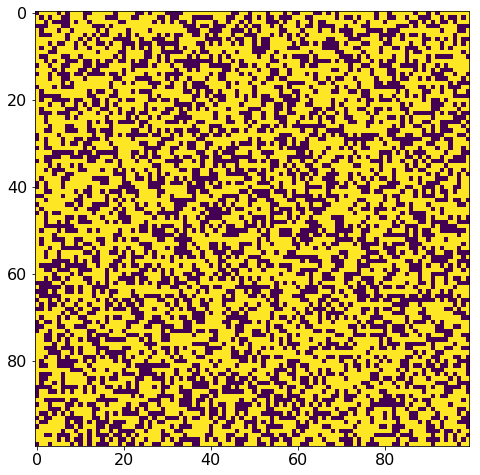

In [3]:
L = 100

r = rand(L, L)
p = 0.6

z = r < p
lw, num = bwlabel(z)

imshow(z)
show()

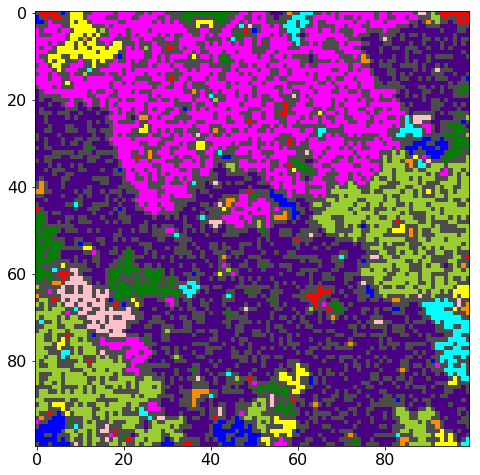

In [4]:
img = label2rgb(lw, bg_label=0, bg_color=[0.3, 0.3, 0.3])
imshow(img)
show()

In [5]:
s = regionprops(lw)
area = [s[i]['area'] for i in range(len(s))]
bbox = [s[i]['bbox'] for i in range(len(s))]


In [6]:
print(area[:10])
print(bbox[:10])

[7, 1, 79, 1561, 20, 4, 1, 21, 2, 4]
[(0L, 1L, 2L, 6L), (0L, 6L, 1L, 7L), (0L, 3L, 14L, 20L), (0L, 0L, 47L, 88L), (0L, 33L, 3L, 45L), (0L, 54L, 2L, 57L), (0L, 58L, 1L, 59L), (0L, 57L, 8L, 64L), (0L, 88L, 1L, 90L), (0L, 91L, 3L, 93L)]


In [ ]:
def percolation_matrix(p, Lx, Ly=None):
    Ly = Lx if Ly is None else Ly 
    r = rand(L, L)
    z = r < p
    lw, num = bwlabel(z)
    return lw, num
            

number_of_p = 100 
ps = [float(i)/number_of_p for i in range(number_of_p)]
P = zeros(len(ps))
Pie = zeros(len(ps))
Lx = 100
Ly = 100

total_area = Lx*Ly

simulation_per_p = 100

for i, pi in enumerate(ps):
    simulation_i = 0
    
    while simulation_per_p > simulation_i:
        lw, num = percolation_matrix(pi, Lx, Ly)
        cluster_infos = regionprops(lw)
    
        areas = array([cluster_infos[k]['area'] for k in range(len(cluster_infos))])
        bboxs = array([cluster_infos[k]['bbox'] for k in range(len(cluster_infos))]).astype(int)
        
        for j, bbox in enumerate(bboxs):
            spansx = bbox[2] - bbox[0]
            spansy = bbox[3] - bbox[1]
            
            if spansx >= Lx or spansy >= Ly:
                P[i] += areas[j]
                Pie[i] += 1.
        simulation_i += 1
        
    Pie[i] /= simulation_per_p
    P[i] /= simulation_per_p * total_area

In [ ]:
import seaborn as sns
sns.set()
sns.set_context("paper", rc={"axes.labelsize":20})

In [ ]:
lplot = sns.lineplot(ps, P, lw=4)
lplot.set_xlabel("p")
lplot.set_ylabel("P(p, Lx={}, Ly={})".format(Lx, Ly))
show()

In [ ]:
lplot = sns.lineplot(ps, Pie, lw=4)
lplot.set_xlabel("p")
lplot.set_ylabel("PI(p, Lx={}, Ly={})".format(Lx, Ly))
show()